## Problem::

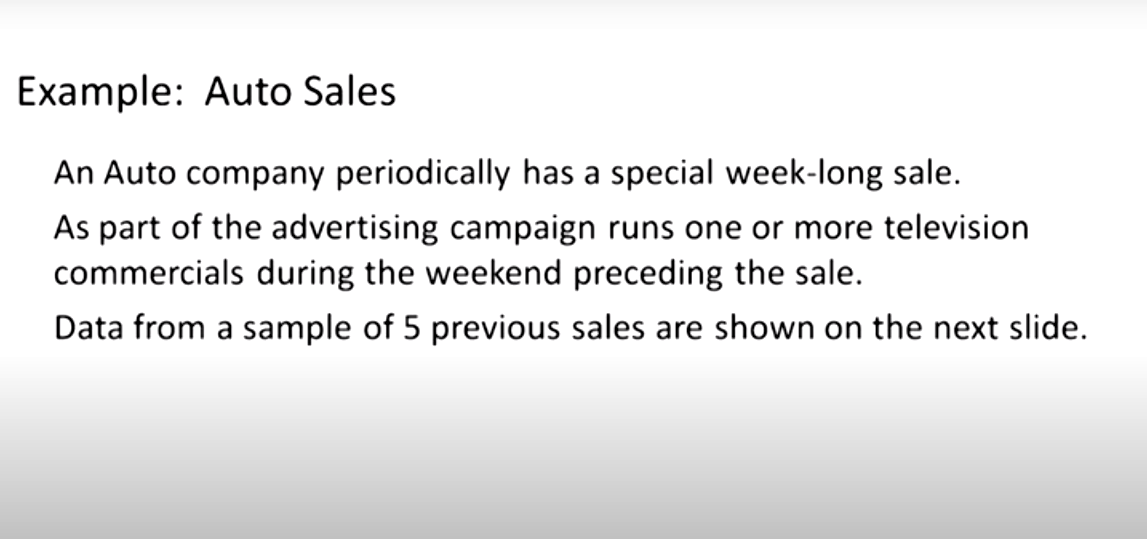

## Data:

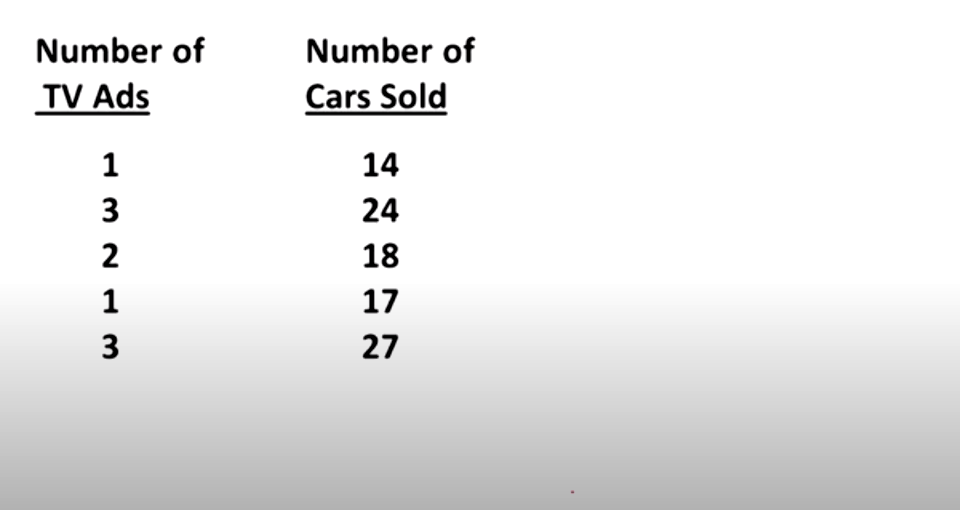

## Solution::

In [16]:
import pandas as pd

data = pd.read_excel("/home/ashish/projects/Regression2_MLE/regcar.xlsx")
data

,TV Ads,car Sold
0,1,14
1,3,24
2,2,18
3,1,17
4,3,27


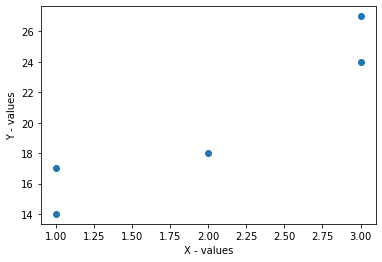

In [17]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(data['TV Ads'],data['car Sold'])
plt.xlabel("X - values")
plt.ylabel("Y - values")
plt.show()

In [18]:
## USing OLS estimation
import statsmodels.api as s
from statsmodels.regression.linear_model import OLS

x = data['TV Ads']
y = data['car Sold']
reg_model = OLS(y,s.add_constant(x)).fit()
reg_model.summary()

/home/ashish/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               car Sold   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     21.43
Date:                Wed, 19 Jan 2022   Prob (F-statistic):             0.0190
Time:                        02:02:03   Log-Likelihood:                -9.6687
No. Observations:                   5   AIC:                             23.34
Df Residuals:                       3   BIC:                             22.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0000      2.366      4.226      0.024       2.469      17.531
TV Ads         5.0000      1.080      4.629      0.019       1.563       8.437
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.214
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.674
Skew:                           0.256   Prob(JB):                        0.714
Kurtosis:                       1.276   Cond. No.                         6.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Regression equation --> car_Sold = 10 + 5*TV_Ads

In [19]:
## dispalying the residuals
residuals = reg_model.resid
residuals

0   -1.0
1   -1.0
2   -2.0
3    2.0
4    2.0
dtype: float64

In [20]:
## calculating standard deviation for error/residual values
import numpy as np
np.std(residuals)

1.6733200530681507

## So using the least sqaure estimation method for regression
    b0 = 10,b1 =5,std =  1.6733200530681507

# Finding the same parameters of regression using MLE (Maximum LIkelihood Estimator)

In [21]:
import numpy as np
from scipy.optimize import minimize
def lik(parameters):
    slope = parameters[0]
    intercept = parameters[1]
    sigma = parameters[2]
    for i  in np.arange(0,len(x)):                  ##arange --> Returns an array with evenly spaced elements as per the interval
        y_exp = slope*x + intercept
    likelihood_func = (len(x)/2*np.log(2*np.pi) + len(x)/2*np.log(sigma**2) + 1/(2*sigma**2)*sum((y-y_exp)**2))
    return likelihood_func

likelihood_model = minimize(lik,np.array([2,2,2]),method='Nelder-Mead')
likelihood_model

 final_simplex: (array([[ 5.00000631, 10.00000822,  1.67332132],
       [ 4.99996581, 10.00008112,  1.67332683],
       [ 4.99998382, 10.00002278,  1.67329385],
       [ 5.00001119,  9.9999767 ,  1.67334933]]), array([9.66874121, 9.66874121, 9.66874121, 9.66874121]))
           fun: 9.668741209395263
       message: 'Optimization terminated successfully.'
          nfev: 212
           nit: 118
        status: 0
       success: True
             x: array([ 5.00000631, 10.00000822,  1.67332132])

In [22]:
likelihood_model.x

array([ 5.00000631, 10.00000822,  1.67332132])

## Again,using the maximum likelihood estimation method for regression, we get the approx. same value for parameters::
    b0 = 10,b1 =5,std =  1.6733200530681507